

# Project: Investigate a TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analysis the dataset of TMDb movie which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> #### The database contain:
> - 10866 rows (movies).
> - 21 columns, some of the columns descriptions provided **below:**<br>
    - *Original title:* the title of the movie.
    - *Cast:* list of actors and actresses names who play a role in the movie.
    - *Homepage:* website for the movie.
    - *Director:* name of the one who directs the movie.
    - *Runtime:* the duration of shooting the associated movie in terms of days.
    - *Genres:* describes the content of the film (Action, Adventure, Science Fiction, Comedy…etc.).
    - *Release_date:* the time where the movie release in terms of day, month, and year.
    - *Vote_count:* number of voted user.
    - *Vote_average:* average rating based on users rating. 
    - *Release_year:* the time where the movie release in terms of year only.
    - *Budget_adj:* the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
    - *Revenue_adj:* the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
>In this investigation we will be interested in finding What kinds of properties are associated with movies that have high revenues?  And Which genres are most popular from year to year? Also, Which genre has the Highest release of movies? Finally Which movies get the highest and lowest average rating?

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Read the CSV File Using Pandas
df = pd.read_csv('tmdb-movies.csv')

# Display first few rows of dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [4]:
# Displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Displays the number of null values in each column
df.isnull().sum().sort_values(ascending= False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

---

- The columns that we are not interested in analyzing it will be dropped.
- the release_date columne have string data type, so it will be converted to datetime.

- Many columns that related to our investigation does not have a null value except genres column, but it considered a small percent(23 rows), therefore these rows will be dropped.
- The genres column contains multiple values separated by pipe (|) characters.


In [6]:
# Returns descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


C:\Users\ohood\anaconda3\envs\project2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohood\anaconda3\envs\project2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohood\anaconda3\envs\project2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ohood\anaconda

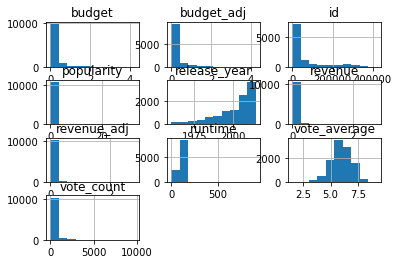

In [7]:
# Explore data
df.hist();

In [8]:
# This returns all rows with zero value in revenue
df[df['revenue'] == 0].shape

(6016, 21)

In [9]:
# This returns all rows with zero value in budget
df[df['budget'] == 0].shape

(5696, 21)

---
- Descriptive statistics and histogram show no outliers.
- Revenue and Budget columns have minimum value of zero, which indicates an invalid or missing value as it not real to have a  revenue or budget for a movie with zero value.
- Revenue column have 6016 row of zero value, Budget have 5696 row of zero value, and that means it is more than 50% of the data, so if we drop it will affect the analysis. as an alternative, we will fill it with mean.


In [10]:
# Check for duplicates in the data
df.duplicated().sum()

1

---
- There is only one duplicated row that will be deleted later.



### Data Cleaning:

To clean the data these steps will be followed:

- Drop unrelated columns to our investigation.
- Drop duplicated rows.
- Drop rows with null values.
- Convert zero value in Budget and Revenue to null and replace it with means.
- Convert release_date column to date time
- To deal with genres column problem, we will create new dataframe that have each movie genre split and placed in its own row, this dataframe will be used only when analyzing genres column.

In [11]:
# Drop unrelated columns
df.drop(['homepage', 'tagline', 'keywords', 'production_companies', 'cast', 'imdb_id', 'overview','director', 'revenue_adj', 'budget_adj'], axis=1, inplace=True)

# Display first few rows of dataframe to confirm changes
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Confirm correction by rechecking for duplicates in the data
df.duplicated().sum()

0

In [13]:
# Drop null values
df.dropna(axis=0, inplace=True)

# Confirm correction by rechecking for null value
df.isnull().sum().sort_values(ascending= False)

release_year      0
vote_average      0
vote_count        0
release_date      0
genres            0
runtime           0
original_title    0
revenue           0
budget            0
popularity        0
id                0
dtype: int64

In [14]:
# Convert zero to null value
df.replace(0, np.nan, inplace=True)

# Use means to fill in missing values
df.fillna(df.mean(), inplace=True)

# Confirm correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null float64
revenue           10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null float64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 1016.4+ KB


In [15]:
# Convert release_date column to date time
df['release_date'] = pd.to_datetime(df['release_date'])
# Confirm correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null float64
revenue           10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null float64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 1016.4+ KB


In [16]:
# Split genres and use explode function to put each genre in a separated row
# Use assign to returns a new DataFrame
df_genres=df.assign(genres=df['genres'].str.split('|')).explode('genres')

# Display first few rows of dataframe to confirm changes
df_genres.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Adventure,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1  (What kinds of properties are associated with movies that have high revenues?)

In [17]:
# Use nlargest to..
# find the ten movies withe high revenues
top_revn = df.nlargest(10, columns='revenue')
top_revn

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,194.0,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,143.0,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,141.0,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,130.0,Adventure|Family|Fantasy,2011-07-07,3750,7.7,2011
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,102.0,Animation|Adventure|Family,2013-11-27,3369,7.5,2013
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,130.0,Action|Adventure|Science Fiction,2013-04-18,6882,6.9,2013


In [18]:
top_revn.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.0000,10.000000,10.000000,10.000000
mean,77975.500000,9.763478,1.952000e+08,1.645657e+09,139.9000,5412.100000,7.250000,2011.500000
std,60952.391227,8.451550,4.553826e+07,4.764679e+08,24.3468,2067.675638,0.343996,5.482295
min,597.000000,4.355219,1.250000e+08,1.215440e+09,102.0000,2947.000000,6.500000,1997.000000
25%,21103.250000,5.769718,1.600000e+08,1.347122e+09,130.0000,3888.500000,7.150000,2011.250000
50%,84291.000000,6.875267,2.000000e+08,1.509889e+09,136.5000,4973.000000,7.300000,2013.000000
75%,128909.000000,9.408329,2.150000e+08,1.763665e+09,142.5000,6552.000000,7.475000,2015.000000
max,168259.000000,32.985763,2.800000e+08,2.781506e+09,194.0000,8903.000000,7.700000,2015.000000


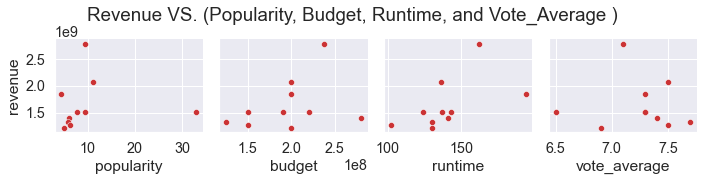

In [19]:
# Setup the figure size and color
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)
sns.set_palette("Set1", 8, .75)

ax = sns.pairplot(top_revn, y_vars=['revenue'],x_vars=['popularity', 'budget', 'runtime', 'vote_average'],
             kind='scatter')
#plt.title('revenue vs My title');
#move overall title up
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Revenue VS. (Popularity, Budget, Runtime, and Vote_Average )');

---
It appears that Popularity and vote_average are not related to revenues, on the other hand its look that there is a direct correlation between budget and revenue, more investment in the movie led to higher revenue, also runtime is associated with revenue, as spending more time in shooting the movie result more revenue.

### Research Question 2  (Which genres are most popular from year to year?)

In [20]:
# Groupby release_year, using level 
# Use nlargest to find the popular
# Use reset_index to trim the row index
genres_per_year = df_genres.groupby(['release_year', 'genres', ]).size().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
genres_per_year

release_year  genres
1960          Drama      13
1961          Drama      16
1962          Drama      21
1963          Comedy     13
1964          Drama      20
1965          Drama      20
1966          Comedy     16
1967          Comedy     17
1968          Drama      20
1969          Drama      13
1970          Drama      19
1971          Drama      30
1972          Drama      16
1973          Drama      31
1974          Drama      21
1975          Drama      17
1976          Drama      22
1977          Drama      24
1978          Drama      29
1979          Drama      30
1980          Drama      32
1981          Drama      32
1982          Drama      33
1983          Drama      35
1984          Drama      40
1985          Comedy     51
1986          Drama      51
1987          Comedy     57
1988          Comedy     69
1989          Comedy     63
1990          Drama      60
1991          Drama      63
1992          Drama      65
1993          Drama      90
1994          Comedy     88

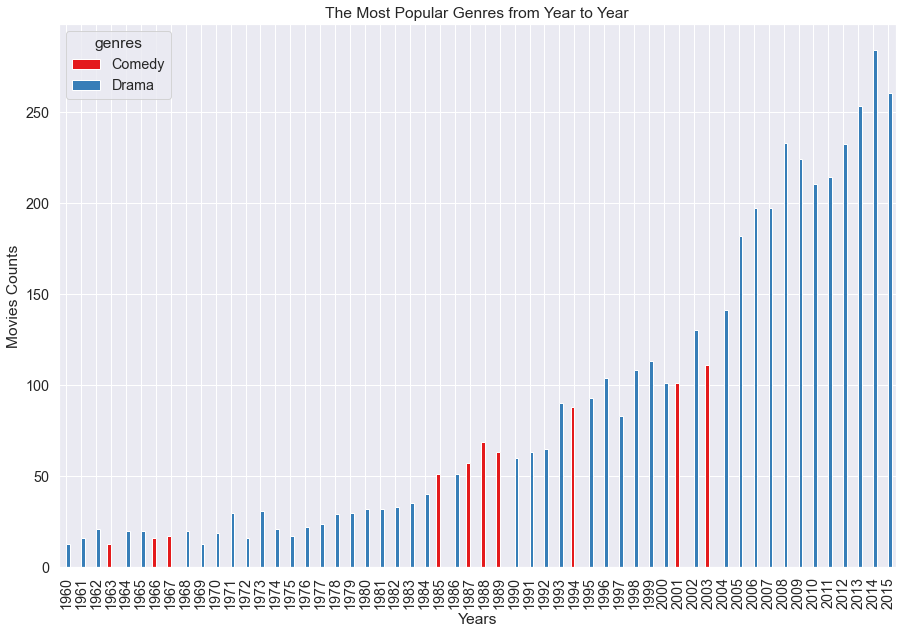

In [21]:
# Setup the figure size and color
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.3)
sns.set_palette("Set1")

# Plot the figure and setup the title and labels
ax = genres_per_year.unstack(level=1).plot(kind='bar');
ax.set(xlabel='Years', ylabel='Movies Counts', title = 'The Most Popular Genres from Year to Year')
# Display the plot
plt.show()

---
As shown, Drama is the most popular genre in movies through all these years (from 1960 to 2015) its dominance over the other genres followed by Comedy.

### Research Question 3  (Which genre has the Highest release of movies?)

In [22]:
# Counting the movies of each genre.
genres_count = df_genres['genres'].value_counts()
genres_count

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

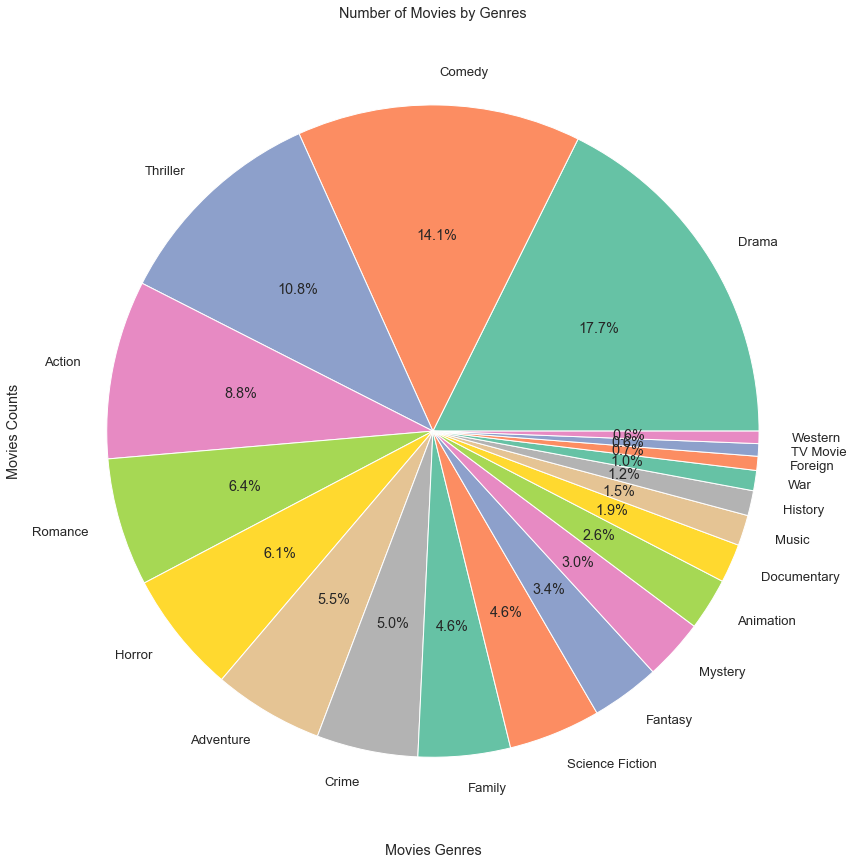

In [23]:
# Setup the figure size and color
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2)
sns.set_palette("Set2")

# Plot the figure and setup the title and labels
ax = genres_count.plot(kind='pie', autopct='%1.1f%%')
ax.set(xlabel='Movies Genres', ylabel='Movies Counts', title = 'Number of Movies by Genres');
# Display the plot
plt.show()

---
From the pie chart it is clear that the majority of produced movies is Drama and Comedy genres with just 3.6% difference between the tow. Drama for 17.7% and Comedy for 14.1%. followed by Thriller and Action with 10.8% and 8.8%, respectively. The Western is the least produced movies by only 0.6%.

### Research Question 4  (Which movies get the highest and lowest average rating?)

In [24]:
def highest_lowest(col):
    """
    Find the highest and lowest values for the specified column.

    Args:
        (col) The column to extract values from it.

    Returns:
        Concatenate highest and lowest values
    """
    # Find the highest value
    highest = df.nlargest(1, columns=col)
    # Find the lowest value
    lowest = df.nsmallest(1, columns=col)
    # Switch axes
    highest_s = highest.swapaxes("index", "columns") 
    lowest_s = lowest.swapaxes("index", "columns")
    # Concatenate values
    return pd.concat([highest_s,lowest_s], axis = 1)

#call the highest_lowest function.
highest_lowest('vote_average')

,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,3.07455e+07,3.07455e+07
revenue,8.92389e+07,8.92389e+07
original_title,The Story of Film: An Odyssey,Transmorphers
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction
release_date,2011-09-03 00:00:00,2007-06-26 00:00:00
vote_count,14,10
vote_average,9.2,1.5


---
As seen from table, the columns represent the features for the movie that have the highest and the lowest rating, respectively.
- The highest rating movie is The Story of Film: An Odyssey that produced in 2011 with rating (9.2).
- The lowest rating movie is Transmorphers that produced in 2007 with rating (1.5).

<a id='conclusions'></a>
## Conclusions

> The purpose of this investigation is to answer four questions 1/ What kinds of properties are associated with movies that have high revenues? 2/ Which genres are most popular from year to year? 3/ Which genre has the Highest release of movies? 4/ Which movies get the highest and lowest average rating? and based on the analysis above we found:
>-	That higher revenue is associated with more time spend on making the movie and more budget.
>-	Drama is the most popular genre in movies all over the years and Comedy is the second one.
>-	Drama, Comedy, Thriller and Action are the most produced genre from 1960 to 2015.
>-	The highest rating movie is The Story of Film: An Odyssey with rating (9.2).
>-	The lowest rating movie is Transmorphers with rating (1.5).
>
> #### Limitations:
    >-	Revenue and Budget have many rows with zero value, about 50% of the data. 
    >-	The genres column contains multiple values separated by pipe (|) characters.
 